# 1. Importing all important libraries and dataset

In [1]:
# Import all the necessary libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set a path string

path=r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 4\Instacart Basket Analysis"

In [3]:
# Import the dataset all_data_combined.pkl as all_data_combined

all_data_combined=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_data_combined.pkl'))

In [37]:
all_data_combined.shape

(30629741, 24)

# 2. Considering any security implication

In [4]:
# Checking the content of the columns to identify PII data 

all_data_combined.head()

,user_id,orders_day_of_week,hour_at_time_of_order,prices,price_range_loc,busiest_day,busiest_days,busiest_periods_of_day,loyalty_flag,avg_spending,spending_flag,order_flag,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,2,8,9.0,Mid-range product,Regularly busy,Regularly days,Most orders,New customer,6.367188,Low spender,Regular customer,Alabama,31,2/17/2019,3,married,40423,both
1,1,3,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,New customer,6.367188,Low spender,Regular customer,Alabama,31,2/17/2019,3,married,40423,both
2,1,3,12,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,New customer,6.367188,Low spender,Regular customer,Alabama,31,2/17/2019,3,married,40423,both
3,1,4,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,New customer,6.367188,Low spender,Regular customer,Alabama,31,2/17/2019,3,married,40423,both
4,1,4,15,9.0,Mid-range product,Least busy,Slowest days,Most orders,New customer,6.367188,Low spender,Regular customer,Alabama,31,2/17/2019,3,married,40423,both


There is  no PII.

# 3. Comparing customer behavior in different geographic areas

### Creating a “region” column based on the “state” column

In [5]:
# creating a function called 'region_label'

def region_label (row):
    if row ['state'] in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey'):
       return 'Northeast'
    elif row ['state'] in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
       return 'Midwest'
    elif row ['state'] in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
       return 'South'
    elif row ['state'] in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
       return 'West'
    else: return 'na'


In [6]:
# Apply the function created above. The following will create a new column called region and checks every row (axis=1) 

all_data_combined['region']=all_data_combined.apply(region_label, axis=1)

In [7]:
# Print the frequency of the 'region' column

all_data_combined['region'].value_counts(dropna=False)

region
South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: count, dtype: int64

### Determining whether there’s a difference in spending habits between the different U.S. regions

In [8]:
# Creating a crosstab

crosstab = pd.crosstab(all_data_combined['region'], all_data_combined['spending_flag'], dropna = False)

In [9]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


# 4. Excluding low activity customers

### Creating exclusion flag

I had a very difficult memory issues on my laptop in the previous excercise while merging the different data sets. I was forced to delet some columns. Unfortunetly the max_order column which could have been used here to exclude low activity customers is also deleted from the dataset. Therefore, I am not able to creat the "low_activity" column. 

### Excluding low-activity customers

In [10]:
# if 4.1 would have been excuted, i could run the following code to extract the 'low_activity' customers
# low_activity = all_data_combined[all_data_combined['low_activity']== 'False']

# 5. Customer profiling

### Customer profiling based on age

In [11]:
# creating age groups

all_data_combined.loc[(all_data_combined['age'] >= 65) , 'age_loc'] = 'Senior'
all_data_combined.loc[(all_data_combined['age'] > 18) & (all_data_combined['age']<65), 'age_loc'] = 'Adult'
all_data_combined.loc[(all_data_combined['age'] <= 18) , 'age_loc'] = 'Young'
                                                         

In [12]:
# Check the frequency of age groups

all_data_combined['age_loc'].value_counts(dropna=False)

age_loc
Adult     22059307
Senior     8097571
Young       472863
Name: count, dtype: int64

### Customer profiling based on income

In [13]:
# First check income distribution 

all_data_combined.income.describe()

count    3.062974e+07
mean     9.945980e+04
std      4.306626e+04
min      2.590300e+04
25%      6.706600e+04
50%      9.661200e+04
75%      1.279340e+05
max      5.939010e+05
Name: income, dtype: float64

In [14]:
# Create income groups

all_data_combined.loc[(all_data_combined['income'] >= 150000) , 'income_loc'] = 'high_income'
all_data_combined.loc[(all_data_combined['income'] > 100000) & (all_data_combined['income']<150000), 'income_loc'] = 'middle_income'
all_data_combined.loc[(all_data_combined['income'] <= 100000) , 'income_loc'] = 'low_income'
                                                         

In [15]:
# Check the frequency of income groups

all_data_combined['income_loc'].value_counts(dropna=False)

income_loc
low_income       16620149
middle_income    10188645
high_income       3820947
Name: count, dtype: int64

### Customer profiling based on number of dependants

In [16]:
# First check number of dependents distribution 

all_data_combined.n_dependants.describe()

count    3.062974e+07
mean     1.501712e+00
std      1.118467e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [17]:
# Profiling based on number of dependent

all_data_combined.loc[(all_data_combined['n_dependants'] > 0) , 'dependant_loc'] = 'young_parent'
all_data_combined.loc[(all_data_combined['n_dependants'] == 0) , 'dependant_loc'] = 'single_adult'
                                                         

In [18]:
# Check the frequency of family size groups

all_data_combined['dependant_loc'].value_counts(dropna=False)

dependant_loc
young_parent    22980043
single_adult     7649698
Name: count, dtype: int64

# 6. Visualization of the distribution of profiles

### Distribution of income groups

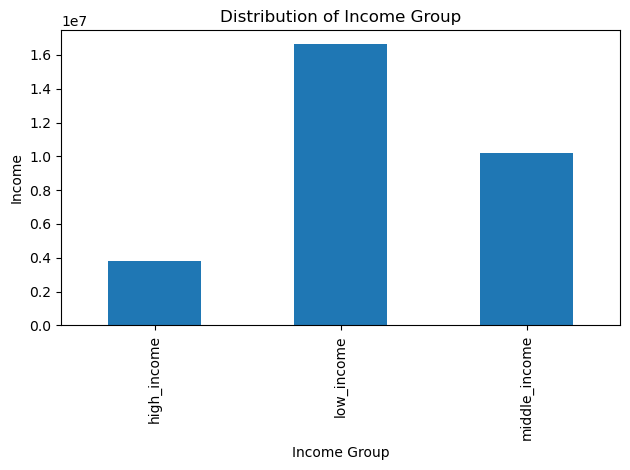

In [19]:
# Creat bar chart for income group distribution

bar= all_data_combined['income_loc'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Income Group')
plt.ylabel('Income')
plt.xlabel('Income Group')
plt.tight_layout()



In [20]:
# Exporting the 'bar' object created above to the 'visualizations' folder

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_loc.png'))

### Distributin of age groups

Text(0.5, 1.0, 'Distribution of Age Group')

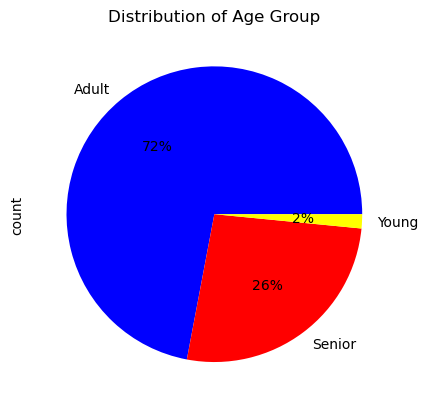

In [21]:
pie= all_data_combined['age_loc'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',  colors=['blue', 'red', 'yellow'])
plt.title('Distribution of Age Group')

In [22]:
# Exporting the 'pie' object created above to the 'visualizations' folder

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_loc.png'))

### Distribution of family size

Text(0.5, 1.0, 'Distribution of Family Group')

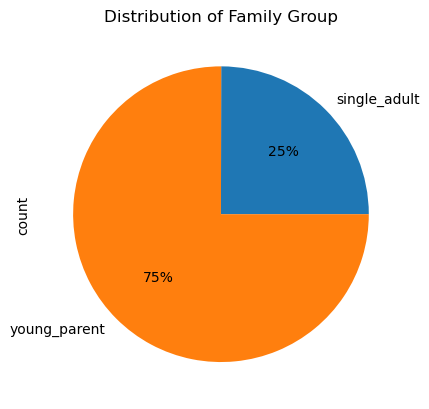

In [23]:
pie= all_data_combined['dependant_loc'].value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.title('Distribution of Family Group')

In [24]:
# Exporting the 'pie' object created above to the 'visualizations' folder

pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependant_loc.png'))

# 7. Aggregation

### Total expenditure per customer

In [25]:
# Calculate total expenditure per customer and assign it to a new column 'total_expenditure'

all_data_combined['total_expenditure'] = all_data_combined.groupby('user_id')['avg_spending'].transform(np.sum)

In [26]:
# Check the newly created column 

all_data_combined['total_expenditure'].describe()

count    3.062974e+07
mean     4.663727e+03
std      2.498657e+04
min      3.000000e+00
25%      1.109391e+03
50%      2.424824e+03
75%      4.769824e+03
max      2.103968e+06
Name: total_expenditure, dtype: float64

In [27]:
all_data_combined.head()

,user_id,orders_day_of_week,hour_at_time_of_order,prices,price_range_loc,busiest_day,busiest_days,busiest_periods_of_day,loyalty_flag,avg_spending,...,date_joined,n_dependants,fam_status,income,_merge,region,age_loc,income_loc,dependant_loc,total_expenditure
0,1,2,8,9.0,Mid-range product,Regularly busy,Regularly days,Most orders,New customer,6.367188,...,2/17/2019,3,married,40423,both,South,Adult,low_income,young_parent,375.664062
1,1,3,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,New customer,6.367188,...,2/17/2019,3,married,40423,both,South,Adult,low_income,young_parent,375.664062
2,1,3,12,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,New customer,6.367188,...,2/17/2019,3,married,40423,both,South,Adult,low_income,young_parent,375.664062
3,1,4,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,New customer,6.367188,...,2/17/2019,3,married,40423,both,South,Adult,low_income,young_parent,375.664062
4,1,4,15,9.0,Mid-range product,Least busy,Slowest days,Most orders,New customer,6.367188,...,2/17/2019,3,married,40423,both,South,Adult,low_income,young_parent,375.664062


### Expenditure by age group

In [28]:
all_data_combined.groupby('age_loc').agg({'total_expenditure': ['max', 'mean', 'min']})

total_expenditure                  
                      max         mean  min
age_loc                                    
Adult           2103968.0  4709.640625  3.0
Senior          1410154.0  4566.786133  3.0
Young            301785.0  4182.011719  8.0

### Expenditure by income group

In [29]:
all_data_combined.groupby('income_loc').agg({'total_expenditure': ['max', 'mean', 'min']})

total_expenditure                         
                            max          mean        min
income_loc                                              
high_income           2103968.0  11737.719727  13.101562
low_income            1102248.0   3314.818359   3.000000
middle_income         1410154.0   4211.239258  21.304688

### Expenditure by family group

In [30]:
all_data_combined.groupby('dependant_loc').agg({'total_expenditure': ['max', 'mean', 'min']})

total_expenditure                  
                            max         mean  min
dependant_loc                                    
single_adult          2101288.0  4598.103027  3.0
young_parent          2103968.0  4685.574219  3.0

 # 8. Comparing customer profiles with regions and departments

Text(0.5, 0, 'Region')

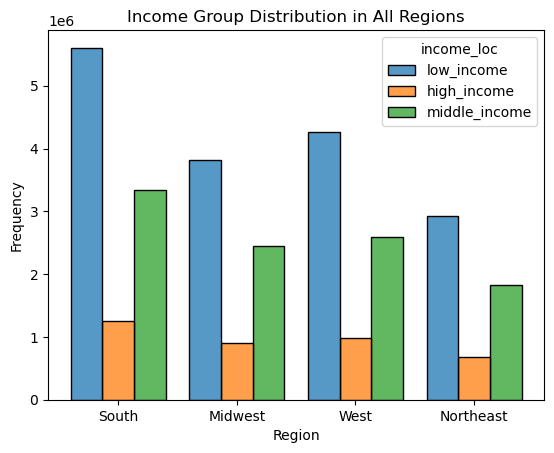

In [31]:
# Create a histogram for income_groups in all regions
histplot_income_group_regions = sns.histplot(data=all_data_combined,x ='region',hue='income_loc',multiple='dodge',shrink=.8)
plt.title('Income Group Distribution in All Regions')
plt.ylabel('Frequency')
plt.xlabel('Region')

In [32]:
# Exporting the 'hist' object created above to the 'visualizations' folder

histplot_income_group_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histplot_income_group_regions.png'))

Text(0.5, 0, 'Region')

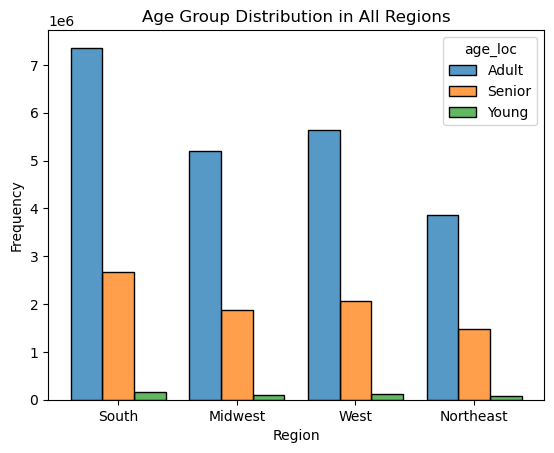

In [33]:
# Creating a histogram for age_groups in all regions

histplot_age_group_regions = sns.histplot(data=all_data_combined,x ='region',hue='age_loc',multiple='dodge',shrink=.8)
plt.title('Age Group Distribution in All Regions')
plt.ylabel('Frequency')
plt.xlabel('Region')

In [34]:
# Exporting the 'hist' object created above to the 'visualizations' folder

histplot_age_group_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histplot_age_group_regions.png'))

Text(0.5, 0, 'Region')

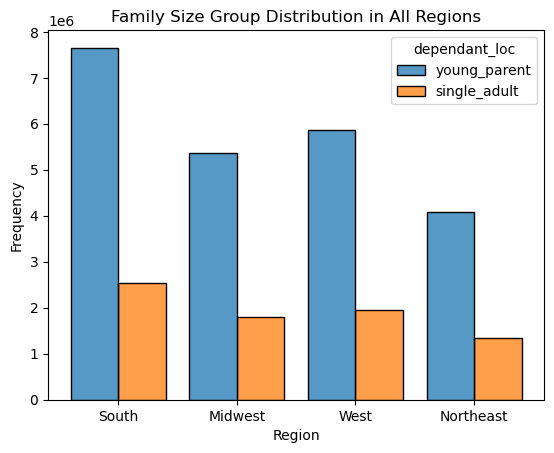

In [35]:
# Create a histogram for n_dependants_groups in all regions

histplot_dependants_group_regions = sns.histplot(data=all_data_combined,x ='region',hue='dependant_loc',multiple='dodge',shrink=.8)
plt.title('Family Size Group Distribution in All Regions')
plt.ylabel('Frequency')
plt.xlabel('Region')

In [36]:
# Exporting the 'hist' object created above to the 'visualizations' folder

histplot_dependants_group_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histplot_dependants_group_regions.png'))